# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [2]:
### YOUR CODE HERE ###
import pandas as pd

df = pd.read_csv("Fishing.csv")
df.head() # косяк, сохранил не в dat

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [4]:
### YOUR CODE HERE ###
df["log_income"] = df['income'].apply('log')
df.head()

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [7]:
### YOUR CODE HERE ###
f = lambda x: abs(x.price - x.pbeach)

df["pdiff"] = df.apply(f, axis=1)
df.head()

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320,8.430182,65.416


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [9]:
### YOUR CODE HERE ###
df.groupby(['mode'])["price"].mean()

mode
beach      35.699493
boat       41.606813
charter    75.096942
pier       30.571326
Name: price, dtype: float64

### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [11]:
### YOUR CODE HERE ###
f_mean_dif_median = lambda x: x.mean() - x.median()

df.groupby(['mode'])["price"].apply(f_mean_dif_median)

mode
beach      16.391493
boat       17.004813
charter    18.226942
pier       13.942326
Name: price, dtype: float64

### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [13]:
for name, data in df.groupby("mode"):
    print(name, data) 

beach       Unnamed: 0.1  Unnamed: 0   mode    price   catch   pbeach    ppier  \
6                6           7  beach   51.934  0.0678   51.934   51.934   
14              14          15  beach   74.514  0.2537   74.514   74.514   
16              16          17  beach   48.114  0.1049   48.114   48.114   
25              25          26  beach   67.784  0.5333   67.784   67.784   
33              33          34  beach    9.522  0.0678    9.522    9.522   
...            ...         ...    ...      ...     ...      ...      ...   
1167          1167        1168  beach   23.688  0.5333   23.688   23.688   
1173          1173        1174  beach   62.634  0.0678   62.634   62.634   
1176          1176        1177  beach  121.836  0.5333  121.836  121.836   
1178          1178        1179  beach  235.436  0.5333  235.436  235.436   
1180          1180        1181  beach   36.636  0.5333   36.636   36.636   

        pboat  pcharter  cbeach   cpier   cboat  ccharter      income  \
6     19

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [0]:
df.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [0]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [14]:
### YOUR CODE HERE ###
for name, data in df.groupby("mode"):
    data.to_csv(f"Fish_{name}.csv")

In [15]:
# Проверка
df_beach = pd.read_csv("Fish_beach.csv")
df_beach.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010,9.076809,0.0
1,14,14,15,beach,74.514,0.2537,74.514,74.514,74.514,93.014,0.2537,0.1498,0.2339,0.6288,8750.0010,9.076809,0.0
2,16,16,17,beach,48.114,0.1049,48.114,48.114,33.534,57.534,0.1049,0.0451,0.1574,0.4671,5416.6667,8.597236,0.0
3,25,25,26,beach,67.784,0.5333,67.784,67.784,17.862,52.862,0.5333,0.4522,0.2413,1.0266,1249.9998,7.130899,0.0
4,33,33,34,beach,9.522,0.0678,9.522,9.522,78.292,107.292,0.0678,0.0789,0.0014,0.0029,3749.9999,8.229511,0.0


### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [21]:
### YOUR CODE HERE ###
df.sort_values(by=["income"], ascending=False, inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.998,9.433484,73.212
130,130,131,boat,94.740,0.0108,205.270,205.270,94.740,129.740,0.0678,0.0025,0.0108,0.2377,12499.998,9.433484,110.530
932,932,933,boat,37.896,0.0531,227.376,227.376,37.896,62.896,0.2537,0.1498,0.0531,0.0052,12499.998,9.433484,189.480
36,36,37,pier,120.004,0.0789,120.004,120.004,252.640,281.640,0.0678,0.0789,0.0014,0.0029,12499.998,9.433484,0.000
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.998,9.433484,183.164


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [27]:
### YOUR CODE HERE ###
df.sort_values(by=["price", "income"], ascending=True, inplace=True)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1157,1157,1158,pier,1.29,0.4522,1.29,1.29,39.99,74.99,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.0
1105,1105,1106,pier,1.29,0.4522,1.29,1.29,39.99,74.99,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.0
1013,1013,1014,beach,1.29,0.5333,1.29,1.29,39.99,74.99,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.0
287,287,288,pier,2.29,0.0789,2.29,2.29,2.29,31.29,0.0678,0.0789,0.1643,0.5391,1249.99980,7.130899,0.0
1155,1155,1156,pier,2.29,0.4522,2.29,2.29,70.99,105.99,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899,0.0


In [28]:
df.sort_values(by=["price", "income"], ascending=False, inplace=True)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
249,249,250,boat,666.110,0.0531,359.022,359.022,666.110,691.110,0.2537,0.1498,0.0531,0.0052,8750.0010,9.076809,307.088
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.6663,8.976725,271.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.0010,9.076809,242.734
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.0013,8.740337,223.960
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.9980,9.433484,183.164


In [29]:
df.groupby(['price'])["income"].mean()

price
1.290        416.66668
2.290       1249.99980
2.322        416.66668
3.096        416.66668
3.290       2083.33320
              ...     
328.432    12499.99800
330.072     6250.00130
335.314     8750.00100
387.208     7916.66630
666.110     8750.00100
Name: income, Length: 539, dtype: float64

### ответ:
Прямой зависимости от заданного вопроса не имеется, но в целом, как можем видеть, крайние гаринцы отображают данную зависимость. Для более точного исследования стоит построить график с отображающий данный разброс

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [24]:
### YOUR CODE HERE ###
df.isnull().sum() # Если значения не равны 0, то есть, как видим - их нет.

Unnamed: 0.1    0
Unnamed: 0      0
mode            0
price           0
catch           0
pbeach          0
ppier           0
pboat           0
pcharter        0
cbeach          0
cpier           0
cboat           0
ccharter        0
income          0
log_income      0
pdiff           0
dtype: int64

In [25]:
df.info() # так же видим, что во всхе столбцах одинаково значений 
          #(Если посчитать число элементов, то их, скорее всего, тоже будет 1182) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 249 to 1013
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  1182 non-null   int64  
 1   Unnamed: 0    1182 non-null   int64  
 2   mode          1182 non-null   object 
 3   price         1182 non-null   float64
 4   catch         1182 non-null   float64
 5   pbeach        1182 non-null   float64
 6   ppier         1182 non-null   float64
 7   pboat         1182 non-null   float64
 8   pcharter      1182 non-null   float64
 9   cbeach        1182 non-null   float64
 10  cpier         1182 non-null   float64
 11  cboat         1182 non-null   float64
 12  ccharter      1182 non-null   float64
 13  income        1182 non-null   float64
 14  log_income    1182 non-null   float64
 15  pdiff         1182 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 157.0+ KB


.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [43]:
### YOUR CODE HERE ###
df_dop = pd.read_csv("wgi_fh.csv", sep=";", decimal=",")
df_dop.head() # косяк, сохранил не в dat

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [44]:
### YOUR CODE HERE ###
print(df_dop.shape)
df_dop.info()
# Так как число элементов не во всех столбцах соответствует числу строк, значит есть пропущенные значения.

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [45]:
### YOUR CODE HERE ###
# Так как такие элементы есть - то удаляем (без доп проверок)
df_dop.dropna(inplace=True)
df_dop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 1 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   195 non-null    object 
 1   cnt_code  195 non-null    object 
 2   year      195 non-null    int64  
 3   va        195 non-null    float64
 4   ps        195 non-null    float64
 5   ge        195 non-null    float64
 6   rq        195 non-null    float64
 7   rl        195 non-null    float64
 8   cc        195 non-null    float64
 9   fh        195 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [46]:
### YOUR CODE HERE ###
df_dop.set_index(["cnt_code"], inplace=True) # Хммм... Он сам удалился, как я понял, он занёся в индекс и сразу удалился...
df_dop.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [48]:
### YOUR CODE HERE ###
df_dop.sort_values(by=["cc", "va"], inplace=True)
df_dop.head()

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [53]:
### YOUR CODE HERE ###
import numpy as np

df_dop["cc_round"] = df_dop["cc"].apply(lambda x: np.round(x,1))
df_dop.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [62]:
### YOUR CODE HERE ###
def fh_status(fh:float)->str:
    if ((fh>=1) & (fh<=2.5)):
        return "Free"
    elif ((fh>=3) & (fh<=5)):
        return "Partly Free"
    elif ((fh>=5.5) & (fh<=7)):
        return "Not Free"
    else:
        return "Not defined"

In [63]:
df_dop["fh_status"] = df_dop["fh"].apply(fh_status)
df_dop.head()

,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,Not Free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,Not Free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,Not Free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,Not Free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,Not Free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [67]:
### YOUR CODE HERE ###
df_dop.groupby(['fh_status'])["ps"].describe()

,count,mean,std,min,25%,50%,75%,max
fh_status,,,,,,,,
Free,85.0,0.619059,0.541964,-0.99,0.2700,0.76,0.9900,1.49
Not Free,50.0,-0.875800,1.014696,-2.91,-1.5325,-0.73,-0.3175,1.26
Partly Free,60.0,-0.424000,0.754079,-2.47,-0.8175,-0.38,-0.0500,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [69]:
### YOUR CODE HERE ###
for name, data in df_dop.groupby('fh_status'):
    data.to_csv(f"wgi_fh_{name}.csv")

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [133]:
### YOUR CODE HERE ###
arr_fh_type = np.array([],dtype=str)
arr_count = np.array([],dtype=int)

for name, data in df_dop.groupby('fh_status'):
    print((name, data["fh_status"].count()))
    arr_fh_type = np.append(arr_fh_type, name)
    arr_count = np.append(arr_count, data["fh_status"].count())

arr = np.array([arr_fh_type,arr_count]).T
df_fh_type = pd.DataFrame(arr, columns=['fh_status', 'count'])
df_fh_type =df_fh_type.astype({"fh_status":str, "count":int})
df_fh_type

('Free', 85)
('Not Free', 50)
('Partly Free', 60)


,fh_status,count
0,Free,85
1,Not Free,50
2,Partly Free,60


In [134]:
df_fh_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   fh_status  3 non-null      object
 1   count      3 non-null      int32 
dtypes: int32(1), object(1)
memory usage: 164.0+ bytes


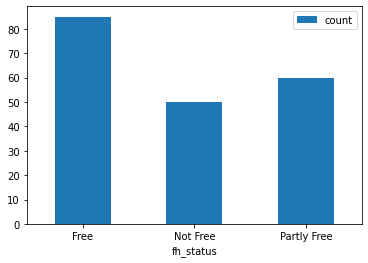

In [135]:
ax = df_fh_type.plot.bar(x='fh_status',y='count', rot=0)